In [1]:
# Task 1: environment set up

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
# Task 2: data collection

cov = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', index_col=0)
cov

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...
2021-08-23,Sweetwater,Wyoming,56037.0,5328,46.0
2021-08-23,Teton,Wyoming,56039.0,4252,11.0
2021-08-23,Uinta,Wyoming,56041.0,2773,14.0


In [3]:
# Task 3: (a) Data cleaning, (b) Data wrangling and (c) EDA w/ clean data

# (a) pre-EDA and Data cleaning

cov.describe()

,fips,cases,deaths
count,1.632701e+06,1.647680e+06,1.610589e+06
mean,3.135937e+04,5.471573e+03,1.086307e+02
std,1.632807e+04,2.666166e+04,6.539489e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.901500e+04,1.530000e+02,2.000000e+00
50%,3.000300e+04,8.960000e+02,1.700000e+01
75%,4.610700e+04,3.141000e+03,6.100000e+01
max,7.803000e+04,1.386207e+06,3.373600e+04


In [4]:
# look for missing data 

cov.isnull().sum()


county        0
state         0
fips      14979
cases         0
deaths    37091
dtype: int64

<AxesSubplot:ylabel='date'>

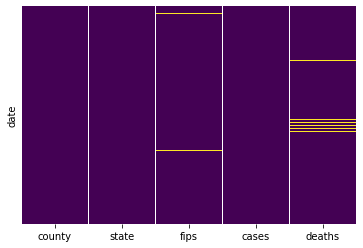

In [5]:
# visualization of missing data

sns.heatmap(cov.isna(),yticklabels=False,cmap="viridis", cbar=False)

In [6]:
# drop fips column as not relevant to our analysis

cov = cov.drop('fips', axis=1)
cov

,county,state,cases,deaths
date,,,,
2020-01-21,Snohomish,Washington,1,0.0
2020-01-22,Snohomish,Washington,1,0.0
2020-01-23,Snohomish,Washington,1,0.0
2020-01-24,Cook,Illinois,1,0.0
2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...
2021-08-23,Sweetwater,Wyoming,5328,46.0
2021-08-23,Teton,Wyoming,4252,11.0
2021-08-23,Uinta,Wyoming,2773,14.0


In [8]:
# Filter data for last 30 days covid data [ALL STATES]

cov.loc['2021-07-27':'2021-08-23']

,county,state,cases,deaths
date,,,,
2021-07-27,Autauga,Alabama,7456,114.0
2021-07-27,Baldwin,Alabama,24213,326.0
2021-07-27,Barbour,Alabama,2451,61.0
2021-07-27,Bibb,Alabama,2829,65.0
2021-07-27,Blount,Alabama,7233,139.0
...,...,...,...,...
2021-08-23,Sweetwater,Wyoming,5328,46.0
2021-08-23,Teton,Wyoming,4252,11.0
2021-08-23,Uinta,Wyoming,2773,14.0


In [9]:
# Filter data by state, county -- [TEXAS, ANGELINA]

local_cov = cov.query('state=="Texas" & county=="Angelina"')
local_cov

,county,state,cases,deaths
date,,,,
2020-03-26,Angelina,Texas,1,0.0
2020-03-27,Angelina,Texas,2,0.0
2020-03-28,Angelina,Texas,1,0.0
2020-03-29,Angelina,Texas,3,0.0
2020-03-30,Angelina,Texas,3,0.0
...,...,...,...,...
2021-08-19,Angelina,Texas,10205,294.0
2021-08-20,Angelina,Texas,10317,294.0
2021-08-21,Angelina,Texas,10317,297.0


In [10]:
# Filter data for last 30 days covid data [TEXAS, ANGELINA]

local_cov.loc['2021-07-27':'2021-08-23']


,county,state,cases,deaths
date,,,,
2021-07-27,Angelina,Texas,8943,288.0
2021-07-28,Angelina,Texas,8990,288.0
2021-07-29,Angelina,Texas,9034,289.0
2021-07-30,Angelina,Texas,9075,289.0
2021-07-31,Angelina,Texas,9075,289.0
2021-08-01,Angelina,Texas,9075,289.0
2021-08-02,Angelina,Texas,9162,289.0
2021-08-03,Angelina,Texas,9162,289.0
2021-08-04,Angelina,Texas,9250,289.0


In [12]:
dd = local_cov.loc['2021-07-25':'2021-08-23']

In [13]:
# add new cases & new deaths  [TEXAS, ANGELINA]

new_cases = (dd.cases.diff())

new_cases

date
2021-07-25      NaN
2021-07-26     43.0
2021-07-27      0.0
2021-07-28     47.0
2021-07-29     44.0
2021-07-30     41.0
2021-07-31      0.0
2021-08-01      0.0
2021-08-02     87.0
2021-08-03      0.0
2021-08-04     88.0
2021-08-05    169.0
2021-08-06      0.0
2021-08-07      0.0
2021-08-08      0.0
2021-08-09    111.0
2021-08-10      0.0
2021-08-11      0.0
2021-08-12      0.0
2021-08-13    309.0
2021-08-14      0.0
2021-08-15    149.0
2021-08-16      0.0
2021-08-17      0.0
2021-08-18    143.0
2021-08-19     74.0
2021-08-20    112.0
2021-08-21      0.0
2021-08-22      0.0
2021-08-23    274.0
Name: cases, dtype: float64

In [14]:
new_deaths = (dd.deaths.diff())

new_deaths

date
2021-07-25    NaN
2021-07-26    0.0
2021-07-27    0.0
2021-07-28    0.0
2021-07-29    1.0
2021-07-30    0.0
2021-07-31    0.0
2021-08-01    0.0
2021-08-02    0.0
2021-08-03    0.0
2021-08-04    0.0
2021-08-05    0.0
2021-08-06    2.0
2021-08-07    0.0
2021-08-08    0.0
2021-08-09    0.0
2021-08-10    0.0
2021-08-11    1.0
2021-08-12    0.0
2021-08-13    0.0
2021-08-14    2.0
2021-08-15    0.0
2021-08-16    0.0
2021-08-17    0.0
2021-08-18    0.0
2021-08-19    0.0
2021-08-20    0.0
2021-08-21    3.0
2021-08-22    0.0
2021-08-23    0.0
Name: deaths, dtype: float64

In [15]:
# combine new columns

dd = dd.assign(new_cases = dd.cases.diff())
dd = dd.assign(new_deaths = dd.deaths.diff())
dd

,county,state,cases,deaths,new_cases,new_deaths
date,,,,,,
2021-07-25,Angelina,Texas,8900,288.0,NaN,NaN
2021-07-26,Angelina,Texas,8943,288.0,43.0,0.0
2021-07-27,Angelina,Texas,8943,288.0,0.0,0.0
2021-07-28,Angelina,Texas,8990,288.0,47.0,0.0
2021-07-29,Angelina,Texas,9034,289.0,44.0,1.0
2021-07-30,Angelina,Texas,9075,289.0,41.0,0.0
2021-07-31,Angelina,Texas,9075,289.0,0.0,0.0
2021-08-01,Angelina,Texas,9075,289.0,0.0,0.0
2021-08-02,Angelina,Texas,9162,289.0,87.0,0.0


In [16]:
dd.isnull().sum()


county        0
state         0
cases         0
deaths        0
new_cases     1
new_deaths    1
dtype: int64

In [17]:
dd.describe()

,cases,deaths,new_cases,new_deaths
count,30.000000,30.000000,29.000000,29.000000
mean,9564.166667,291.466667,58.310345,0.310345
std,499.280454,2.849481,83.771417,0.760801
min,8900.000000,288.000000,0.000000,0.000000
25%,9096.750000,289.000000,0.000000,0.000000
50%,9474.500000,291.000000,0.000000,0.000000
75%,9988.000000,294.000000,88.000000,0.000000
max,10591.000000,297.000000,309.000000,3.000000


In [28]:
# Remplace NaN with the median

dd.fillna(value=0, inplace=True)

dd

,county,state,cases,deaths,new_cases,new_deaths
date,,,,,,
2021-07-25,Angelina,Texas,8900,288.0,0.0,0.0
2021-07-26,Angelina,Texas,8943,288.0,43.0,0.0
2021-07-27,Angelina,Texas,8943,288.0,0.0,0.0
2021-07-28,Angelina,Texas,8990,288.0,47.0,0.0
2021-07-29,Angelina,Texas,9034,289.0,44.0,1.0
2021-07-30,Angelina,Texas,9075,289.0,41.0,0.0
2021-07-31,Angelina,Texas,9075,289.0,0.0,0.0
2021-08-01,Angelina,Texas,9075,289.0,0.0,0.0
2021-08-02,Angelina,Texas,9162,289.0,87.0,0.0


In [30]:
dd.describe()

,cases,deaths,new_cases,new_deaths
count,30.000000,30.000000,30.000000,30.000000
mean,9564.166667,291.466667,56.366667,0.300000
std,499.280454,2.849481,82.999993,0.749713
min,8900.000000,288.000000,0.000000,0.000000
25%,9096.750000,289.000000,0.000000,0.000000
50%,9474.500000,291.000000,0.000000,0.000000
75%,9988.000000,294.000000,87.750000,0.000000
max,10591.000000,297.000000,309.000000,3.000000


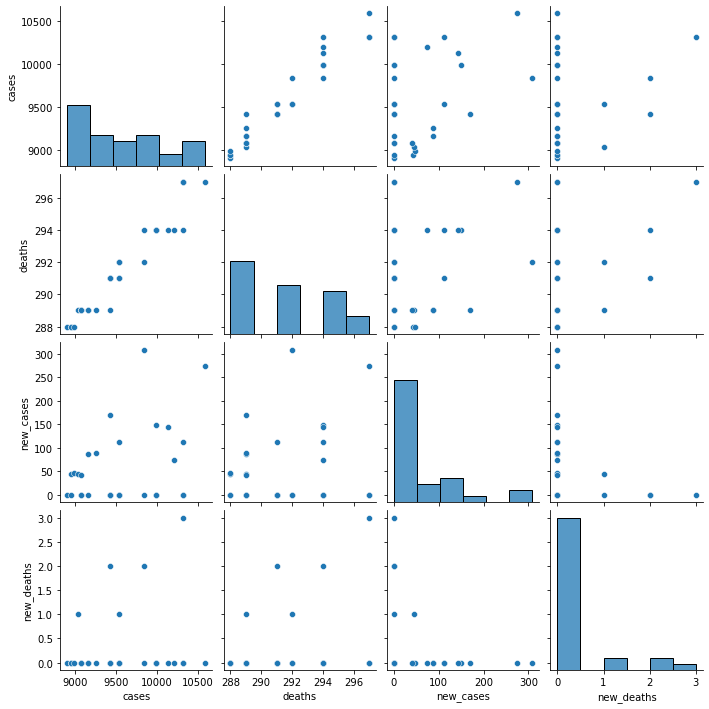

In [34]:
# EDA : overview 

sns.pairplot(dd)

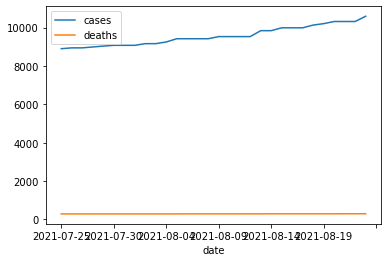

In [31]:
# EDA : cases vs death

dd['cases'].plot()

dd['deaths'].plot()

plt.legend()

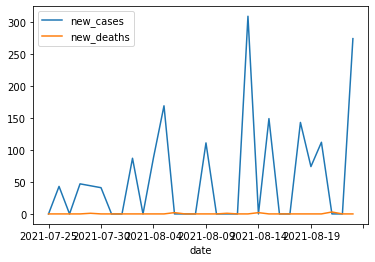

In [32]:
# EDA : new cases  vs  new deaths

dd['new_cases'].plot()

dd['new_deaths'].plot()

plt.legend()

<AxesSubplot:ylabel='series'>

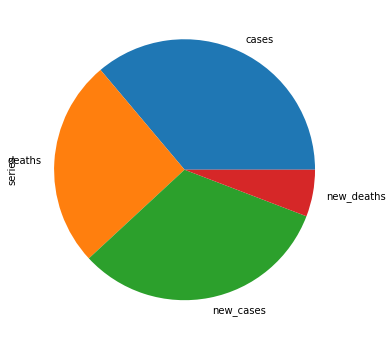

In [41]:
# EDA : comparaison

series = pd.Series(3 * np.random.rand(4), index=['cases', 'deaths', 'new_cases', 'new_deaths'], name='series')

series.plot.pie(figsize=(6, 6))

In [ ]:
# Overall, the number of cases and new covid cases exceed the number of deaths


In [53]:
# Task 5 : Comparing COVID 19 data from different states

cov
cov.loc['2021-07-25':'2021-08-23']
dc = cov.loc['2021-07-25':'2021-08-23']
dc

,county,state,cases,deaths
date,,,,
2021-07-25,Autauga,Alabama,7419,113.0
2021-07-25,Baldwin,Alabama,23810,325.0
2021-07-25,Barbour,Alabama,2434,61.0
2021-07-25,Bibb,Alabama,2801,65.0
2021-07-25,Blount,Alabama,7184,139.0
...,...,...,...,...
2021-08-23,Sweetwater,Wyoming,5328,46.0
2021-08-23,Teton,Wyoming,4252,11.0
2021-08-23,Uinta,Wyoming,2773,14.0


In [54]:
localdata = dc.query('state=="Tennessee"')
localdata

,county,state,cases,deaths
date,,,,
2021-07-25,Anderson,Tennessee,8897,177.0
2021-07-25,Bedford,Tennessee,6766,133.0
2021-07-25,Benton,Tennessee,1711,41.0
2021-07-25,Bledsoe,Tennessee,2256,12.0
2021-07-25,Blount,Tennessee,16154,201.0
...,...,...,...,...
2021-08-23,Wayne,Tennessee,3283,36.0
2021-08-23,Weakley,Tennessee,4717,70.0
2021-08-23,White,Tennessee,4117,75.0


In [56]:
localdata.describe()

,cases,deaths
count,2880.000000,2880.000000
mean,9495.788194,133.167361
std,17162.871440,216.902514
min,635.000000,12.000000
25%,2525.000000,40.000000
50%,4303.000000,75.000000
75%,7642.250000,136.750000
max,120459.000000,1831.000000


In [57]:
# look for missing data 

localdata.isnull().sum()

county    0
state     0
cases     0
deaths    0
dtype: int64

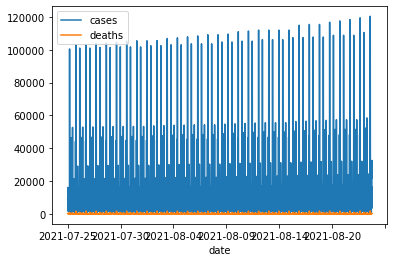

In [60]:
localdata['cases'].plot()

localdata['deaths'].plot()

plt.legend()

In [61]:
localdata_2 = dc.query('state=="Texas"')
localdata_2

,county,state,cases,deaths
date,,,,
2021-07-25,Anderson,Texas,6212,133.0
2021-07-25,Andrews,Texas,1866,47.0
2021-07-25,Angelina,Texas,8900,288.0
2021-07-25,Aransas,Texas,1410,43.0
2021-07-25,Archer,Texas,820,12.0
...,...,...,...,...
2021-08-23,Wood,Texas,4256,137.0
2021-08-23,Yoakum,Texas,987,29.0
2021-08-23,Young,Texas,2347,46.0


In [62]:
localdata_2.describe()

,cases,deaths
count,7620.000000,7620.000000
mean,12807.377034,212.833596
std,44133.401317,658.656231
min,3.000000,0.000000
25%,688.000000,19.000000
50%,2122.500000,48.000000
75%,5869.750000,128.000000
max,479547.000000,6986.000000


In [63]:
# look for missing data 

localdata_2.isnull().sum()

county    0
state     0
cases     0
deaths    0
dtype: int64

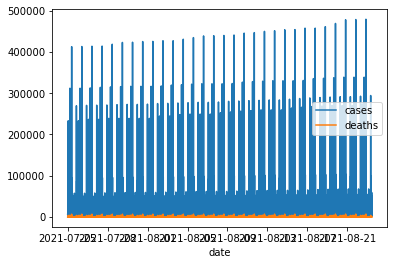

In [64]:
localdata_2['cases'].plot()

localdata_2['deaths'].plot()

plt.legend()

In [ ]:
# Overall, the number of covid cases and deaths in Texas exceed those in Tennessee
